In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/user/Downloads/ML/Loksabha2019.csv')

In [3]:
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
data.dtypes

STATE                                           object
CONSTITUENCY                                    object
NAME                                            object
WINNER                                           int64
PARTY                                           object
SYMBOL                                          object
GENDER                                          object
CRIMINAL\r\nCASES                               object
AGE                                            float64
CATEGORY                                        object
EDUCATION                                       object
ASSETS                                          object
LIABILITIES                                     object
GENERAL\r\nVOTES                                 int64
POSTAL\r\nVOTES                                  int64
TOTAL\r\nVOTES                                   int64
OVER TOTAL ELECTORS \r\nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY    float64
TOTAL ELEC

In [5]:
data.isna().sum()

STATE                                            0
CONSTITUENCY                                     0
NAME                                             0
WINNER                                           0
PARTY                                            0
SYMBOL                                         245
GENDER                                         245
CRIMINAL\r\nCASES                              245
AGE                                            245
CATEGORY                                       245
EDUCATION                                      245
ASSETS                                         245
LIABILITIES                                    245
GENERAL\r\nVOTES                                 0
POSTAL\r\nVOTES                                  0
TOTAL\r\nVOTES                                   0
OVER TOTAL ELECTORS \r\nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY      0
TOTAL ELECTORS                                   0
dtype: int64

In [6]:
# data['CRIMINAL\r\nCASES'] = data['CRIMINAL\r\nCASES'].astype('int')

In [7]:
data['CRIMINAL\r\nCASES'].value_counts()

0                1242
1                 313
2                 119
3                 104
4                  64
5                  42
6                  26
Not Available      22
7                  18
8                  16
10                 11
9                  11
11                  5
14                  4
12                  4
13                  3
15                  2
41                  1
52                  1
24                  1
22                  1
31                  1
240                 1
40                  1
42                  1
16                  1
204                 1
18                  1
28                  1
Name: CRIMINAL\r\nCASES, dtype: int64

### EDA (descriptive analytics - we can use every information) 

1- Which party has candidates with crimanal cases

2- party vs asset

3- age profiling of candidates

4- gender diversity

5- Election result summary (party vs number of seats won/ number of seats contested)

6- partywise voteshare

7- partywise performance in state level

8- what is the significance of Cases/Education in winning the election

9- Categorywise(cast) representation

10- Polling percentage analysis

11- Margin analysis



### 1- Which party has candidates with crimanal cases

In [8]:
def c_convert(x):
    try:
        a = int(x)
    except:
        a = 0
    return a

In [9]:
data['CRIMINAL\r\nCASES'] = data['CRIMINAL\r\nCASES'].map(lambda x: c_convert(x)) 

In [10]:
data['CRIMINAL\r\nCASES'].isna().sum()

0

In [11]:
data['PARTY'].unique()

array(['BJP', 'TRS', 'INC', 'NOTA', 'BSP', 'NCP', 'VBA', 'APoI', 'CPI(M)',
       'BDJS', 'AITC', 'RSP', 'SP', 'YSRCP', 'TDP', 'JnP', 'INLD', 'SBSP',
       'IND', 'SHS', 'AAP', 'SAD', 'JKN', 'JKPDP', 'JPC', 'DMK', 'PMK',
       'NTK', 'MNM', 'AIADMK', 'RJD', 'CPI(ML)(L)', 'SSD', 'PPA', 'JD(S)',
       'NPEP', 'BMUP', 'BJD', 'AIMIM', 'HAMS', 'AHFBK', 'PPID', 'SPL',
       'ASDC', 'RLD', 'PSPL', 'JD(U)', 'BTP', 'AIFB', 'AGP', 'AIUDF',
       'ABSKP', 'PUNEKP', 'RTORP', 'JNJP', 'LTSP', 'RVNP', 'JANADIP',
       'SDPI', 'DMDK', 'ABGP', 'VCK', 'JMM', 'LIP', 'JDR', 'MOSP', 'MADP',
       'AJPR', 'PMP', 'BBMP', 'AJSUP', 'JVM', 'RMPOI', 'LJP', 'BJKVP',
       'SWP', 'NEINDP', 'RSPSR', 'ravp', 'RSOSP', 'BLSP', 'WPOI',
       'SUCI(C)', 'SJDD', 'ANC', 'JDL', 'VSIP', 'AAM', 'JKP', 'BOPF',
       'UPPL', 'CPIM', 'GGP', 'KEC(M)', 'KEC', 'JAPL', 'AKBMP', 'TJS',
       'IUML', 'BSCP', 'ADAL', 'BRPI', 'MNF', 'PRISMP', 'VPI', 'YKP',
       'NDPP', 'RLTP', 'RAHIS', 'NPF', 'BLSD', 'BVA', 'NAWPP', 'AINRC

In [12]:
# the parties has atleast one criminal case
data['PARTY'][data['CRIMINAL\r\nCASES']>0].unique()

array(['BJP', 'INC', 'NCP', 'CPI(M)', 'BDJS', 'JnP', 'INLD', 'BSP', 'IND',
       'SHS', 'VBA', 'SAD', 'AAP', 'YSRCP', 'JKPDP', 'DMK', 'PMK', 'AITC',
       'RJD', 'CPI(ML)(L)', 'NPEP', 'AIMIM', 'AHFBK', 'SP', 'SBSP',
       'JD(U)', 'AGP', 'AIUDF', 'PUNEKP', 'BTP', 'JANADIP', 'SDPI',
       'DMDK', 'NTK', 'ABGP', 'VCK', 'AIFB', 'MNM', 'BJD', 'TDP', 'HAMS',
       'APoI', 'AJSUP', 'JMM', 'JVM', 'LJP', 'SWP', 'RSPSR', 'ravp',
       'BLSP', 'SUCI(C)', 'AIADMK', 'JDL', 'VSIP', 'TRS', 'RSP', 'CPIM',
       'KEC', 'JKP', 'LIP', 'JAPL', 'TJS', 'IUML', 'RLD', 'ADAL', 'BVA',
       'BNDl', 'RAHIS', 'MSHP', 'JNJP', 'AAM', 'JD(S)', 'JKN', 'PSPL',
       'JKNPP', 'AHNP'], dtype=object)

In [13]:
data.groupby('PARTY')['CRIMINAL\r\nCASES'].mean().sort_values(ascending=False).head(10)

PARTY
JAPL          31.000000
JVM           11.500000
SWP            9.000000
MSHP           5.000000
AIMIM          4.333333
CPI(ML)(L)     4.166667
BLSP           3.600000
DMDK           3.500000
JDL            3.500000
AIUDF          3.000000
Name: CRIMINAL\r\nCASES, dtype: float64

In [14]:
data.groupby('PARTY')['CRIMINAL\r\nCASES'].sum().sort_values(ascending=False).head(10)

PARTY
BJP       898
INC       734
BSP       175
CPI(M)    168
IND       131
SP         74
SHS        62
NCP        54
RJD        52
VBA        44
Name: CRIMINAL\r\nCASES, dtype: int64

In [15]:
data.groupby(['STATE','PARTY'])['CRIMINAL\r\nCASES'].sum().sort_values(ascending = False).head(10)

STATE          PARTY
Kerala         BJP      333
               INC      256
West Bengal    BJP      173
Uttar Pradesh  BJP      126
               INC      109
               BSP      107
Telangana      INC       79
               BJP       75
Uttar Pradesh  SP        66
Odisha         INC       65
Name: CRIMINAL\r\nCASES, dtype: int64

In [16]:
data.groupby(['STATE','PARTY'])['CRIMINAL\r\nCASES'].mean().sort_values(ascending = False).head(10)

STATE                 PARTY     
Bihar                 JAPL          31.000000
Kerala                BJP           22.200000
                      INC           16.000000
Jharkhand             JVM           11.500000
Maharashtra           SWP            9.000000
Daman & Diu           IND            8.000000
Maharashtra           CPI(M)         7.666667
Dadra & Nagar Haveli  BJP            6.000000
Gujarat               BTP            6.000000
Bihar                 CPI(ML)(L)     5.250000
Name: CRIMINAL\r\nCASES, dtype: float64

In [17]:
# data['CRIMINAL\r\nCASES'] = data['CRIMINAL\r\nCASES'].replace('Not Available', np.nan).astype(float).values

In [18]:
# le = data['CRIMINAL\r\nCASES'].shape[0]
# dic = {}
# for i in range(le):
#     if (data['CRIMINAL\r\nCASES'][i]>0):
#         if (data['PARTY'][i]) in dic:
#             dic[data['PARTY'][i]] += data['CRIMINAL\r\nCASES'][i]
#         else:
#             dic[data['PARTY'][i]] = data['CRIMINAL\r\nCASES'][i]
# # dic

In [19]:
# sorted_dic_list = sorted(dic.items(), key=lambda x: x[1], reverse=True)
# sorted_dic = {}
# for i in sorted_dic_list:
#     sorted_dic[i[0]]=i[1]
# # sorted_dic

In [20]:
# import matplotlib.pyplot as plt

# lst_party = list(sorted_dic.keys())
# criminal_cases = list(sorted_dic.values())
# plt.bar(lst_party[:10],criminal_cases[:10])
# plt.title('Party vs criminal cases')
# plt.ylabel('criminal cases')
# plt.xlabel('party')
# plt.show()

### 2 - party vs asset

In [21]:
def convert(x):
    try:
        a = int(x.split('\r')[0].split(' ')[1].replace(',',''))
    except:
        a = 0
    return a

In [22]:
data.dtypes

STATE                                           object
CONSTITUENCY                                    object
NAME                                            object
WINNER                                           int64
PARTY                                           object
SYMBOL                                          object
GENDER                                          object
CRIMINAL\r\nCASES                                int64
AGE                                            float64
CATEGORY                                        object
EDUCATION                                       object
ASSETS                                          object
LIABILITIES                                     object
GENERAL\r\nVOTES                                 int64
POSTAL\r\nVOTES                                  int64
TOTAL\r\nVOTES                                   int64
OVER TOTAL ELECTORS \r\nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY    float64
TOTAL ELEC

In [23]:
data['ASSETS'] = data['ASSETS'].map(lambda x: convert(x))

In [24]:
data['LIABILITIES'] = data['LIABILITIES'].map(lambda x: convert(x))

In [25]:
le = data['ASSETS'].shape[0]
dic1 = {}
for i in range(le):
    if (data['ASSETS'][i]>0):
        if (data['PARTY'][i]) in dic1:
            dic1[data['PARTY'][i]] += data['ASSETS'][i]
        else:
            dic1[data['PARTY'][i]] = data['ASSETS'][i]

In [26]:
sorted_dic_ = sorted(dic1.items(), key=lambda x: x[1], reverse=True)
sorted_dic1 = {}
for i in sorted_dic_:
    sorted_dic1[i[0]]=i[1]

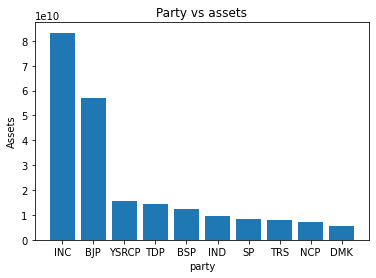

In [27]:
party = list(sorted_dic1.keys())
assets = list(sorted_dic1.values())
plt.bar(party[:10],assets[:10])
plt.title('Party vs assets')
plt.ylabel('Assets')
plt.xlabel('party')
plt.show()

In [28]:
# avg assets of each party
party_v_asset_avg = data.groupby('PARTY')['ASSETS'].mean()
party_v_asset_avg.sort_values(ascending=False).head(10)

PARTY
ravp     9.120029e+08
YSRCP    6.294556e+08
TDP      5.777990e+08
SAD      5.193560e+08
TRS      4.587524e+08
JD(S)    3.696704e+08
NCP      3.379414e+08
JPC      2.897775e+08
JKN      2.689864e+08
AIUDF    2.678746e+08
Name: ASSETS, dtype: float64

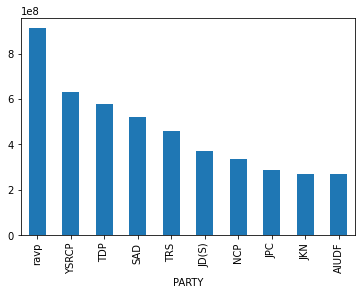

In [29]:
party_v_asset_avg.sort_values(ascending=False).head(10).plot.bar()

In [30]:
# total assests of each party
party_v_asset_sum = data.groupby('PARTY')['ASSETS'].sum()
party_v_asset_sum.sort_values(ascending=False).head(10)

PARTY
INC      83256870327
BJP      56846800470
YSRCP    15736391083
TDP      14444975063
BSP      12476010257
IND       9376211677
SP        8164099370
TRS       7798790966
NCP       7096769715
DMK       5637461254
Name: ASSETS, dtype: int64

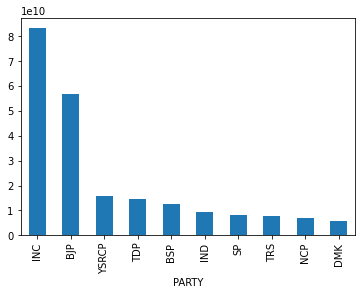

In [31]:
party_v_asset_sum.sort_values(ascending=False).head(10).plot.bar()

In [32]:
# state wise total assets of each party
party_v_asset_state = data.groupby(['STATE','PARTY']).sum()['ASSETS']
party_v_asset_state.sort_values(ascending=False).head(10)

STATE           PARTY
Andhra Pradesh  YSRCP    15736391083
                TDP      14444975063
Madhya Pradesh  INC      13651456940
Uttar Pradesh   BJP      12900417208
Telangana       INC      12386885697
Uttar Pradesh   INC       8632163370
                SP        8116051073
Telangana       TRS       7798790966
Karnataka       BJP       7125369293
Maharashtra     NCP       7089506547
Name: ASSETS, dtype: int64

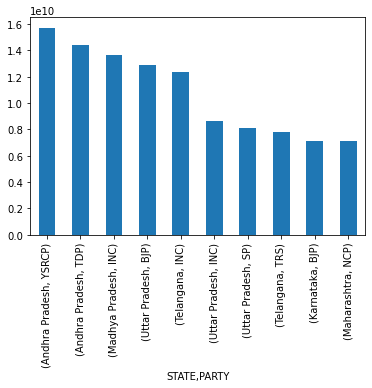

In [33]:
party_v_asset_state.sort_values(ascending=False).head(10).plot.bar()

In [34]:
# state wise avg assets of each party
party_v_asset_state = data.groupby(['STATE','PARTY']).mean()['ASSETS']
party_v_asset_state.sort_values(ascending=False).head(10)

STATE                 PARTY
Bihar                 ravp     9.120029e+08
                      INC      7.580705e+08
Telangana             INC      7.286403e+08
Arunachal Pradesh     INC      6.782404e+08
Andhra Pradesh        YSRCP    6.294556e+08
Tamil Nadu            INC      6.267398e+08
Andhra Pradesh        TDP      5.777990e+08
Punjab                SAD      5.193560e+08
Dadra & Nagar Haveli  BJP      4.969427e+08
Punjab                BSP      4.765186e+08
Name: ASSETS, dtype: float64

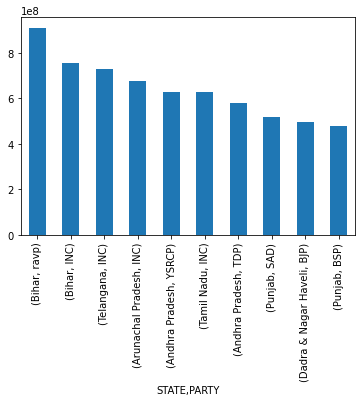

In [35]:
party_v_asset_state.sort_values(ascending=False).head(10).plot.bar()

In [36]:
party_v_asset_state = data.groupby(['STATE','PARTY']).mean()['ASSETS']
party_v_asset_state['Telangana'].sort_values(ascending=False)

PARTY
INC       7.286403e+08
TRS       4.587524e+08
BJP       2.234240e+08
AIMIM     1.790444e+08
JnP       5.885292e+07
CPI(M)    1.898838e+07
IND       2.378791e+06
AHNP      1.665000e+06
BSP       7.701100e+05
TJS       0.000000e+00
NOTA      0.000000e+00
Name: ASSETS, dtype: float64

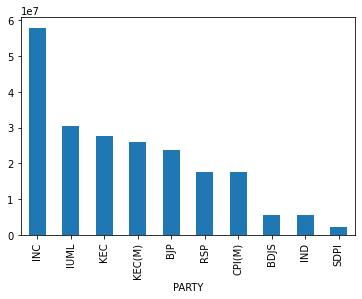

In [37]:
party_v_asset_state['Kerala'].sort_values(ascending=False).plot.bar()

### 3 - partywise voteshare

In [38]:
party_v_vote = data.groupby('PARTY')['TOTAL\r\nVOTES'].sum()
party_v_vote.sort_values(ascending = False).head(10)

PARTY
BJP       228938556
INC       119418722
AITC       24832104
BSP        20808194
SP         15616282
YSRCP      15537006
CPI(M)     14180942
DMK        13877992
SHS        12618927
TDP        12515345
Name: TOTAL\r\nVOTES, dtype: int64

### 4 - age profiling of candidates

In [39]:
# Average age of candidates based on state,party,gender

In [40]:
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,0,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [41]:
# bin the ages to 25-35,35-45,45-55,55+

In [42]:
data['AGE'].min()

25.0

In [43]:
data['AGE'].max()

86.0

In [44]:
data['AGE_PROFILING'] = data['AGE'].map(lambda x : '25-35' if (x>=25 and x<=35) else ('36-45' if x>35 and x<=45 else ('46-55' if(x>45 and x<=55)else ('55+' if x>55 else x))))


In [45]:
data.groupby(['AGE_PROFILING'])['AGE'].count()

AGE_PROFILING
25-35    177
36-45    432
46-55    575
55+      834
Name: AGE, dtype: int64

In [46]:
data.groupby(['WINNER','AGE_PROFILING'])['WINNER'].count()

WINNER  AGE_PROFILING
0       25-35            148
        36-45            343
        46-55            410
        55+              578
1       25-35             29
        36-45             89
        46-55            165
        55+              256
Name: WINNER, dtype: int64

In [47]:
# Average age of candidates based on state
data.groupby('STATE')['AGE'].mean().sort_values(ascending = False)

STATE
Chandigarh                   64.500000
Goa                          59.666667
Nagaland                     58.333333
Uttarakhand                  57.285714
Jammu & Kashmir              56.428571
Punjab                       56.264151
Kerala                       55.682540
Manipur                      55.200000
Tripura                      55.125000
Uttar Pradesh                54.940239
Gujarat                      54.536232
Karnataka                    54.500000
Himachal Pradesh             54.444444
West Bengal                  53.543353
Andhra Pradesh               53.415842
Assam                        52.818182
Odisha                       52.438356
Rajasthan                    51.878378
Arunachal Pradesh            51.700000
Madhya Pradesh               51.688172
Maharashtra                  51.308571
NCT OF Delhi                 51.000000
Telangana                    50.797297
Meghalaya                    50.500000
Mizoram                      50.400000
Andaman & Nicobar I

In [48]:
# Average age of candidates based on party
data.groupby('PARTY')['AGE'].mean().sort_values(ascending = False).head(10)

PARTY
SAD(M)    74.0
JKN       73.0
VPI       70.0
BOPF      69.0
KEC       68.0
NAWPP     68.0
ravp      68.0
KEC(M)    66.0
SJDD      65.0
WPOI      65.0
Name: AGE, dtype: float64

In [49]:
# Average age of candidates based on gender
data.groupby('GENDER')['AGE'].mean()

GENDER
FEMALE    47.065891
MALE      53.036932
Name: AGE, dtype: float64

In [50]:
# Age vs winning election

In [51]:
data.groupby('WINNER')['AGE'].mean()

WINNER
0    51.483435
1    54.441558
Name: AGE, dtype: float64

In [52]:
data.groupby('WINNER')['AGE'].head()

0     52.0
1     54.0
2     52.0
3      NaN
4     58.0
5     47.0
6     54.0
7     37.0
10    58.0
12    69.0
Name: AGE, dtype: float64

### 5- gender diversity

#### by state

In [53]:
data.groupby(['STATE','GENDER'])['GENDER'].count().sort_values(ascending = False)

STATE                 GENDER
Uttar Pradesh         MALE      217
Bihar                 MALE      197
Tamil Nadu            MALE      162
Maharashtra           MALE      156
West Bengal           MALE      136
                               ... 
Uttarakhand           FEMALE      1
Arunachal Pradesh     FEMALE      1
Puducherry            FEMALE      1
Jammu & Kashmir       FEMALE      1
Dadra & Nagar Haveli  FEMALE      1
Name: GENDER, Length: 63, dtype: int64

In [54]:
data.groupby(['STATE','GENDER'])['GENDER'].count()['Kerala']

GENDER
FEMALE     7
MALE      56
Name: GENDER, dtype: int64

#### by party

In [55]:
data.groupby(['PARTY','GENDER'])['GENDER'].count()

PARTY  GENDER
AAM    FEMALE     1
       MALE       1
AAP    FEMALE     3
       MALE      22
ABGP   MALE       1
                 ..
WPOI   MALE       1
YKP    MALE       1
YSRCP  FEMALE     4
       MALE      21
ravp   MALE       1
Name: GENDER, Length: 171, dtype: int64

In [56]:
data.groupby(['CONSTITUENCY','GENDER'])['GENDER'].count()

CONSTITUENCY     GENDER
ADILABAD         MALE      3
AGRA             FEMALE    1
                 MALE      2
AHMADNAGAR       MALE      3
AHMEDABAD EAST   FEMALE    1
                          ..
WAYANAD          MALE      3
WEST DELHI       MALE      3
YAVATMAL-WASHIM  FEMALE    2
                 MALE      4
ZAHIRABAD        MALE      3
Name: GENDER, Length: 747, dtype: int64

### 6- Election result summary (party vs number of seats won/ number of seats contested)

In [57]:
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS,AGE_PROFILING
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790,46-55
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790,46-55
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790,46-55
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,0,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790,NaN
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690,55+


In [58]:
# number of seats contested
data.groupby('PARTY')['PARTY'].count().sort_values(ascending = False).head(10)

PARTY
BJP       420
INC       413
NOTA      245
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
SP         39
NTK        38
Name: PARTY, dtype: int64

In [59]:
# number of seats won
data.groupby('PARTY')['WINNER'].sum().sort_values(ascending=False).head(10)

PARTY
BJP      300
INC       52
DMK       23
YSRCP     22
AITC      22
SHS       18
JD(U)     16
BSP       11
BJD       11
TRS        9
Name: WINNER, dtype: int64

In [60]:
data[data.WINNER==0].groupby(['PARTY'])['PARTY'].count().sort_values(ascending = False).head(10)

PARTY
INC       361
NOTA      245
IND       197
BSP       152
BJP       120
CPI(M)     95
VBA        47
NTK        38
MNM        36
SP         34
Name: PARTY, dtype: int64

### 7- partywise performance in state level

In [61]:
partywise_performance = data.groupby(['STATE','PARTY'])['WINNER'].sum()
partywise_performance['Kerala'].sort_values(ascending = False)

PARTY
INC       15
IUML       2
RSP        1
KEC(M)     1
CPI(M)     1
SDPI       0
KEC        0
IND        0
BJP        0
BDJS       0
Name: WINNER, dtype: int64

### 8- what is the significance of Cases/Education in winning the election

In [62]:
# significance of Education in winning the election
data.groupby('EDUCATION')['WINNER'].sum().sort_values(ascending = False)

EDUCATION
Post Graduate            134
Graduate                 132
Graduate Professional     99
12th Pass                 69
10th Pass                 45
Doctorate                 23
Others                    17
8th Pass                  12
5th Pass                   4
Literate                   2
Post Graduate\r\n          1
Illiterate                 1
Not Available              0
Name: WINNER, dtype: int64

In [63]:
# significance of Cases in winning the election
data.groupby('CRIMINAL\r\nCASES')['WINNER'].sum().sort_values(ascending = False)

CRIMINAL\r\nCASES
0      306
1       86
2       40
3       31
4       23
5       18
6        9
7        8
8        3
9        3
14       3
11       2
204      1
10       1
13       1
18       1
24       1
42       1
52       1
12       0
15       0
16       0
22       0
28       0
31       0
40       0
41       0
240      0
Name: WINNER, dtype: int64

### 9- Categorywise(cast) representation

In [64]:
data['CATEGORY'].unique()

array(['ST', nan, 'SC', 'GENERAL'], dtype=object)

In [65]:
# total no. of contestants in each category
data.groupby(['CATEGORY'])['WINNER'].count()

CATEGORY
GENERAL    1392
SC          383
ST          243
Name: WINNER, dtype: int64

In [66]:
# total no. of winners in each category
data.groupby(['CATEGORY'])['WINNER'].sum()

CATEGORY
GENERAL    399
SC          85
ST          55
Name: WINNER, dtype: int64

In [67]:
# state wise contestants in each category
state_wise_contestants = data.groupby(['STATE','CATEGORY']).count()['WINNER']
state_wise_contestants['Kerala']

CATEGORY
GENERAL    57
SC          6
Name: WINNER, dtype: int64

In [68]:
# state wise winners in each category
state_wise_contestants = data.groupby(['STATE','CATEGORY']).sum()['WINNER']
state_wise_contestants['Kerala']

CATEGORY
GENERAL    18
SC          2
Name: WINNER, dtype: int64

In [69]:
# count of gender of contestants in each category
data.groupby(['CATEGORY','GENDER']).count()['WINNER']

CATEGORY  GENDER
GENERAL   FEMALE     175
          MALE      1217
SC        FEMALE      47
          MALE       336
ST        FEMALE      36
          MALE       207
Name: WINNER, dtype: int64

In [70]:
# count of gender of winners in each category
data.groupby(['CATEGORY','GENDER']).sum()['WINNER']

CATEGORY  GENDER
GENERAL   FEMALE     53
          MALE      346
SC        FEMALE     12
          MALE       73
ST        FEMALE     11
          MALE       44
Name: WINNER, dtype: int64

In [71]:
data.shape


(2263, 20)

In [72]:
data.head(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS,AGE_PROFILING
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790,46-55
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790,46-55
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790,46-55
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,0,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790,NaN
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690,55+
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690,46-55
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,55075753,0,44877,272,45149,2.330042,3.940979,1937690,46-55
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,168664576,2623964,696961,7699,704660,37.856533,58.425159,1861396,36-45
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,94488381,32549132,419364,3822,423186,22.734872,35.087431,1861396,25-35
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,13949000,1400000,31644,163,31807,1.708771,2.637200,1861396,55+


In [73]:
data.dtypes

STATE                                           object
CONSTITUENCY                                    object
NAME                                            object
WINNER                                           int64
PARTY                                           object
SYMBOL                                          object
GENDER                                          object
CRIMINAL\r\nCASES                                int64
AGE                                            float64
CATEGORY                                        object
EDUCATION                                       object
ASSETS                                           int64
LIABILITIES                                      int64
GENERAL\r\nVOTES                                 int64
POSTAL\r\nVOTES                                  int64
TOTAL\r\nVOTES                                   int64
OVER TOTAL ELECTORS \r\nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY    float64
TOTAL ELEC